Exploratory Data Analysis (EDA) - Question Paper 

In [ ]:
import sys
print(sys.executable)

In [ ]:
import sys
!"{sys.executable}" -m pip install seaborn

In [2]:
#import all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Section A: Data Loading & Basic Understanding (15 
Marks)

In [3]:
#import csv
df = pd.read_csv('online_shop_data_messy - online_shop_data_messy.csv')

In [4]:
#to see 1st 10 rows
df.head(10)

,Order_ID,Customer_ID,Product_Name,Category,Price,Quantity,Discount_Percent,Payment_Method,City,Delivery_Status,Rating,Order_Date,Customer_Age,Customer_Gender,Extra_Column
0,ORD001,CUST101,Samsung Galaxy S23,Electronics,85000,1.0,10,bKash,Dhaka,Delivered,5.0,2024-01-15,28.0,Male,NaN
1,ORD002,CUST102,Nike Air Max,fashion,12000,2.0,5,Nagad,CHITTAGONG,Delivered,4.0,2024-01-16,22.0,Female,NaN
2,ORD003,CUST103,HP Laptop i5,Electronics,65000,1.0,15,Credit Card,Dhaka,Delivered,5.0,01/17/2024,35.0,Male,NaN
3,ORD004,CUST104,Levi's Jeans,Fashion,3500,3.0,0,bKash,Sylhet,Pending,NaN,2024-01-18,19.0,M,NaN
4,ORD005,NaN,Walton Fridge,Home Appliances,45000,1.0,20,EMI,Khulna,Delivered,4.0,2024-01-19,42.0,Female,NaN
5,ORD006,CUST106,Adidas T-Shirt,Fashion,2500,4.0,10,Rocket,Rajshahi,Delivered,3.0,2024-01-20,25.0,male,NaN
6,ORD007,CUST107,iPhone 14 Pro,Electronics,125000,1.0,5,Credit Card,Dhaka,Cancelled,0.0,2024-01-21,31.0,Female,NaN
7,ORD008,CUST108,Puma Shoes,FASHION,8000,1.0,15,bkash,chittagong,Delivered,5.0,2024-01-22,27.0,Male,NaN
8,ORD009,CUST109,"Panasonic TV 43""",Electronics,52000,1.0,12,Nagad,Dhaka,Delivered,4.0,2024-01-23,38.0,NaN,NaN
9,ORD010,CUST110,Aarong Saree,Fashion,5500,2.0,8,Cash on Delivery,Sylhet,Delivered,5.0,2024-01-24,NaN,Female,NaN


In [5]:
#to see how many rows and columns
df.shape

(101, 15)

Question 2: Dataset Information (4 Marks)  

In [6]:
#to find basic info of dataset
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          101 non-null    str    
 1   Customer_ID       99 non-null     str    
 2   Product_Name      101 non-null    str    
 3   Category          101 non-null    str    
 4   Price             100 non-null    str    
 5   Quantity          99 non-null     float64
 6   Discount_Percent  101 non-null    int64  
 7   Payment_Method    101 non-null    str    
 8   City              101 non-null    str    
 9   Delivery_Status   101 non-null    str    
 10  Rating            98 non-null     float64
 11  Order_Date        101 non-null    str    
 12  Customer_Age      97 non-null     float64
 13  Customer_Gender   99 non-null     str    
 14  Extra_Column      1 non-null      str    
dtypes: float64(3), int64(1), str(11)
memory usage: 12.0 KB


In [7]:
#To check missing values
df.isnull().sum()
# Alternative
df.isna().sum()
#or 
df.isnull().any()


Order_ID            False
Customer_ID          True
Product_Name        False
Category            False
Price                True
Quantity             True
Discount_Percent    False
Payment_Method      False
City                False
Delivery_Status     False
Rating               True
Order_Date          False
Customer_Age         True
Customer_Gender      True
Extra_Column         True
dtype: bool

In [8]:
#to find columns types
df.dtypes

Order_ID                str
Customer_ID             str
Product_Name            str
Category                str
Price                   str
Quantity            float64
Discount_Percent      int64
Payment_Method          str
City                    str
Delivery_Status         str
Rating              float64
Order_Date              str
Customer_Age        float64
Customer_Gender         str
Extra_Column            str
dtype: object

In [9]:
#To find descrivtive statistics for numeric columns
df.describe()

,Quantity,Discount_Percent,Rating,Customer_Age
count,99.000000,101.000000,98.000000,97.000000
mean,2.000000,10.940594,3.969388,31.793814
std,1.772811,4.444821,1.358092,13.851097
min,1.000000,0.000000,0.000000,19.000000
25%,1.000000,8.000000,4.000000,25.000000
50%,1.000000,10.000000,4.000000,30.000000
75%,2.000000,15.000000,5.000000,36.000000
max,10.000000,20.000000,6.000000,150.000000


In [10]:
df["Price"].dtype

<StringDtype(storage='python', na_value=nan)>

In [11]:
df['Price'] = df['Price'].str.replace('-', '',regex=False)
df['Price'] = df['Price'].str.replace('twelve thousand', '12000',regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df["Price"].dtype


dtype('float64')

In [12]:
#statistical details of price column
print(df["Price"].mean())
print(df["Price"].median())
print(df["Price"].std())

21587.3
7600.0
30277.509032983937


Question 4
a) Convert Order_Date

In [13]:
#Check the original data type
df['Order_Date'].dtype
#Convert it to a datetime format. 
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
#Verify
df['Order_Date'].dtype

dtype('<M8[us]')

B) Find unique values of Categorical variables

In [14]:
categorical_col=df.select_dtypes(include="object").columns
for col in categorical_col:
    print(col, df[col].nunique())

Order_ID 100
Customer_ID 98
Product_Name 100
Category 8
Payment_Method 7
City 8
Delivery_Status 4
Customer_Gender 6
Extra_Column 1


C:\Users\Nayeem\AppData\Local\Temp\ipykernel_6580\26445943.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_col=df.select_dtypes(include="object").columns


✅ Section B: Data Cleaning & Preprocessing
Question 5
a) 3 Missing Value Methods

In [15]:
df.isnull().sum()
df.isna().sum()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          101 non-null    str           
 1   Customer_ID       99 non-null     str           
 2   Product_Name      101 non-null    str           
 3   Category          101 non-null    str           
 4   Price             100 non-null    float64       
 5   Quantity          99 non-null     float64       
 6   Discount_Percent  101 non-null    int64         
 7   Payment_Method    101 non-null    str           
 8   City              101 non-null    str           
 9   Delivery_Status   101 non-null    str           
 10  Rating            98 non-null     float64       
 11  Order_Date        96 non-null     datetime64[us]
 12  Customer_Age      97 non-null     float64       
 13  Customer_Gender   99 non-null     str           
 14  Extra_Column      1 non-null      str

b) Fill Rating with Median

In [16]:
median_rating = df['Rating'].median()
df['Rating'].fillna(median_rating, inplace=True)

C:\Users\Nayeem\AppData\Local\Temp\ipykernel_6580\2422286439.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Rating'].fillna(median_rating, inplace=True)


0      5.0
1      4.0
2      5.0
3      4.0
4      4.0
      ... 
96     4.0
97     5.0
98     5.0
99     4.0
100    5.0
Name: Rating, Length: 101, dtype: float64

Question 6: Duplicate Detection (3 Marks)  

In [17]:
#a) Check duplicates
df.duplicated().value_counts()

False    101
Name: count, dtype: int64

In [18]:
#B)Drop duplicates
df.drop_duplicates(inplace=True)

Question 7: Outlier Detection (5 Marks)  

In [19]:
#Detecting outliers in "Price" column
#Check "Price" datatype
df["Price"].dtype
#Select quantile
q1=df["Price"].quantile(0.25)
q3=df["Price"].quantile(0.75)
IQR=q3-q1
lower= q1-1.5*IQR
upper=q3-1.5*IQR
outliers=df[(df["Price"]<lower) & (df["Price"]> upper)]
print(outliers)

Empty DataFrame
Columns: [Order_ID, Customer_ID, Product_Name, Category, Price, Quantity, Discount_Percent, Payment_Method, City, Delivery_Status, Rating, Order_Date, Customer_Age, Customer_Gender, Extra_Column]
Index: []


In [20]:
df["Price"].describe()

count       100.000000
mean      21587.300000
std       30277.509033
min         450.000000
25%        2800.000000
50%        7600.000000
75%       24250.000000
max      135000.000000
Name: Price, dtype: float64

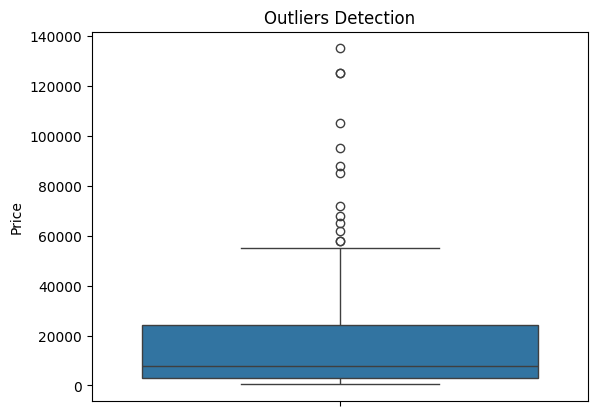

In [21]:
#B) Boxplot
sns.boxplot(df["Price"])
plt.title("Outliers Detection")
plt.show()

Question 8: Data Filtering

In [22]:
#Orders only from Dhaka
Dhaka_Ord=df[df["City"]=="Dhaka"]
Dhaka_Ord

,Order_ID,Customer_ID,Product_Name,Category,Price,Quantity,Discount_Percent,Payment_Method,City,Delivery_Status,Rating,Order_Date,Customer_Age,Customer_Gender,Extra_Column
0,ORD001,CUST101,Samsung Galaxy S23,Electronics,85000.0,1.0,10,bKash,Dhaka,Delivered,5.0,2024-01-15,28.0,Male,NaN
2,ORD003,CUST103,HP Laptop i5,Electronics,65000.0,1.0,15,Credit Card,Dhaka,Delivered,5.0,NaT,35.0,Male,NaN
6,ORD007,CUST107,iPhone 14 Pro,Electronics,125000.0,1.0,5,Credit Card,Dhaka,Cancelled,0.0,2024-01-21,31.0,Female,NaN
8,ORD009,CUST109,"Panasonic TV 43""",Electronics,52000.0,1.0,12,Nagad,Dhaka,Delivered,4.0,2024-01-23,38.0,NaN,NaN
12,ORD013,CUST113,Sony Headphones,Electronics,12000.0,2.0,20,Nagad,Dhaka,Delivered,4.0,2024-01-27,24.0,Male,NaN
16,ORD016,CUST116,Samsung Phone A54,Electronics,42000.0,NaN,8,bKash,Dhaka,Delivered,5.0,2024-01-30,21.0,Female,NaN
18,ORD018,CUST118,MacBook Air M2,Electronics,135000.0,1.0,5,EMI,Dhaka,Delivered,5.0,2024-02-02,36.0,Male,NaN
20,ORD020,CUST120,Xiaomi Smart Watch,Electronics,15000.0,1.0,18,bKash,Dhaka,Cancelled,NaN,2024-02-04,28.0,Male,NaN
22,ORD022,CUST122,Philips Air Fryer,Home Appliances,12000.0,1.0,15,bKash,Dhaka,Delivered,5.0,2024-02-06,39.0,Female,NaN
25,ORD025,CUST125,LG Washing Machine,Home Appliances,38000.0,1.0,20,EMI,Dhaka,Delivered,4.0,2024-02-09,44.0,Male,NaN


In [23]:
#b) Discount > 15%
high_discount = df[df['Discount_Percent'] > 15]
high_discount

,Order_ID,Customer_ID,Product_Name,Category,Price,Quantity,Discount_Percent,Payment_Method,City,Delivery_Status,Rating,Order_Date,Customer_Age,Customer_Gender,Extra_Column
4,ORD005,NaN,Walton Fridge,Home Appliances,45000.0,1.0,20,EMI,Khulna,Delivered,4.0,2024-01-19,42.0,Female,NaN
12,ORD013,CUST113,Sony Headphones,Electronics,12000.0,2.0,20,Nagad,Dhaka,Delivered,4.0,2024-01-27,24.0,Male,NaN
20,ORD020,CUST120,Xiaomi Smart Watch,Electronics,15000.0,1.0,18,bKash,Dhaka,Cancelled,NaN,2024-02-04,28.0,Male,NaN
25,ORD025,CUST125,LG Washing Machine,Home Appliances,38000.0,1.0,20,EMI,Dhaka,Delivered,4.0,2024-02-09,44.0,Male,NaN
33,ORD033,CUST133,Walton AC,Home Appliances,55000.0,1.0,18,EMI,Sylhet,Delivered,4.0,2024-02-17,NaN,Female,NaN
41,ORD041,CUST141,Mi Power Bank,Electronics,1800.0,3.0,20,Rocket,Chittagong,Delivered,4.0,2024-02-25,26.0,Male,NaN
55,ORD055,CUST155,Bajaj Mixer,Home Appliances,6500.0,1.0,18,Cash on Delivery,Dhaka,Delivered,3.0,2024-03-11,42.0,Male,NaN
65,ORD065,CUST165,Boat Earbuds,Electronics,2500.0,3.0,20,bKash,Dhaka,Delivered,4.0,2024-03-21,21.0,Male,NaN
73,ORD073,CUST173,Havells Geyser,Home Appliances,15000.0,1.0,18,Nagad,Sylhet,Delivered,4.0,2024-03-29,150.0,Female,NaN
77,ORD077,CUST177,Samsung Fridge,Home Appliances,62000.0,1.0,20,EMI,Dhaka,Delivered,5.0,2024-04-02,40.0,Female,NaN


Question 9: Feature Engineering

In [24]:
#a) Total_Amount
df['Total_Amount'] = df['Price'] * df['Quantity']
df.head(5)

,Order_ID,Customer_ID,Product_Name,Category,Price,Quantity,Discount_Percent,Payment_Method,City,Delivery_Status,Rating,Order_Date,Customer_Age,Customer_Gender,Extra_Column,Total_Amount
0,ORD001,CUST101,Samsung Galaxy S23,Electronics,85000.0,1.0,10,bKash,Dhaka,Delivered,5.0,2024-01-15,28.0,Male,NaN,85000.0
1,ORD002,CUST102,Nike Air Max,fashion,12000.0,2.0,5,Nagad,CHITTAGONG,Delivered,4.0,2024-01-16,22.0,Female,NaN,24000.0
2,ORD003,CUST103,HP Laptop i5,Electronics,65000.0,1.0,15,Credit Card,Dhaka,Delivered,5.0,NaT,35.0,Male,NaN,65000.0
3,ORD004,CUST104,Levi's Jeans,Fashion,3500.0,3.0,0,bKash,Sylhet,Pending,NaN,2024-01-18,19.0,M,NaN,10500.0
4,ORD005,NaN,Walton Fridge,Home Appliances,45000.0,1.0,20,EMI,Khulna,Delivered,4.0,2024-01-19,42.0,Female,NaN,45000.0


In [25]:
#b) Discount_Amount
df['Discount_Amount'] = df['Total_Amount'] * df['Discount_Percent'] / 100
df.head(5)

,Order_ID,Customer_ID,Product_Name,Category,Price,Quantity,Discount_Percent,Payment_Method,City,Delivery_Status,Rating,Order_Date,Customer_Age,Customer_Gender,Extra_Column,Total_Amount,Discount_Amount
0,ORD001,CUST101,Samsung Galaxy S23,Electronics,85000.0,1.0,10,bKash,Dhaka,Delivered,5.0,2024-01-15,28.0,Male,NaN,85000.0,8500.0
1,ORD002,CUST102,Nike Air Max,fashion,12000.0,2.0,5,Nagad,CHITTAGONG,Delivered,4.0,2024-01-16,22.0,Female,NaN,24000.0,1200.0
2,ORD003,CUST103,HP Laptop i5,Electronics,65000.0,1.0,15,Credit Card,Dhaka,Delivered,5.0,NaT,35.0,Male,NaN,65000.0,9750.0
3,ORD004,CUST104,Levi's Jeans,Fashion,3500.0,3.0,0,bKash,Sylhet,Pending,NaN,2024-01-18,19.0,M,NaN,10500.0,0.0
4,ORD005,NaN,Walton Fridge,Home Appliances,45000.0,1.0,20,EMI,Khulna,Delivered,4.0,2024-01-19,42.0,Female,NaN,45000.0,9000.0


✅ Section C: Univariate Analysis

Question 10: Categorical Variable Analysis (5 Marks) 

In [26]:
#a) Category counts with %
cat_counts = df['Category'].value_counts()
cat_percent = df['Category'].value_counts(normalize=True) * 100

cat_counts
cat_percent

Category
Electronics        34.653465
Fashion            32.673267
Home Appliances    15.841584
Beauty             11.881188
home appliances     1.980198
fashion             0.990099
FASHION             0.990099
electronics         0.990099
Name: proportion, dtype: float64

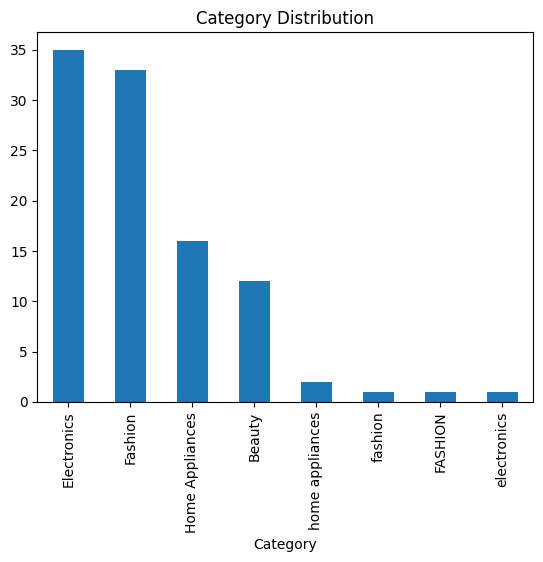

In [27]:
#Bar Chart
cat_counts.plot(kind='bar')
plt.title("Category Distribution")
plt.show()

Question 11

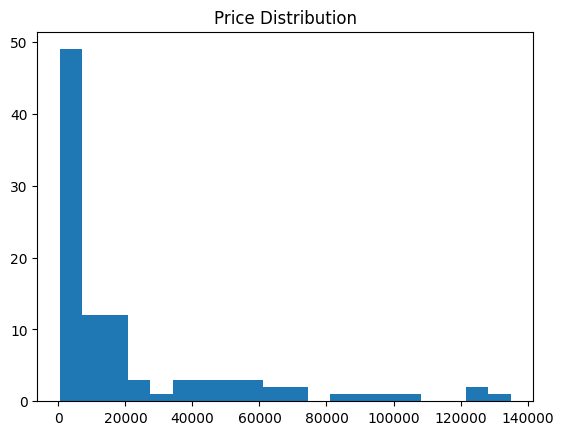

In [28]:
#a) Histogram
plt.hist(df['Price'], bins=20)
plt.title("Price Distribution")
plt.show()